In [8]:
#!/usr/bin/env python
# coding: utf-8

# =============================================================== #
# author: Yung-Hsin Chen, Chih-Fang Chou                          #
# copyright: Copyright 2018, Academia Sinica Internship Project   #                                                   #
# =============================================================== #

# import modules
from scipy.special import erf, erfinv, gammainc
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from scipy.special import gamma, factorial

## Define score (error function)

In [9]:
def score(B, m, db, x):
    s = (x - B) / B**0.5
    a = erfinv(0.98) / db
    return (erf(a*(s - m)) + 1) * 0.5

## Mapping function

In [10]:
def f(x, a):
    return x**(a)

## Finding signal with confidence interval given (not necessary)

In [11]:
def sb(l, n, prob, output) :
    tol = 0.00001
    sig = l ** 0.5
    k = l + n * sig
    p0 = l + n * sig
    p1 = l + (n + 1) * sig
    q0 = gammainc(p0, k) - (1 - prob)
    q1 = gammainc(p1, k) - (1 - prob)
    while True :
        p = p1 - q1 * ((p1 - p0) / (q1 - q0))
        if abs(p - p1) < tol :
            break
        q = gammainc(p, k) - (1 - prob)
        if q * q1 < 0 :
            p0 = p1
            q0 = q1
        p1 = p
        q1 = q
    if output == 's' or output == 'S':
        return p - l
    elif output == 'total':
        return p        
    elif output == 'ceil':
        return math.ceil(p - l)

## Mapping the score by the mapping functions

In [12]:
def Mapping(m, delta, alpha):
    mapping_list = []
    S = np.linspace(0.01, 1, 1000)
    for i in S:
        mapping_list.append(f(score(0.01, m, delta, i), alpha))
    return mapping_list

## Result of mapping

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

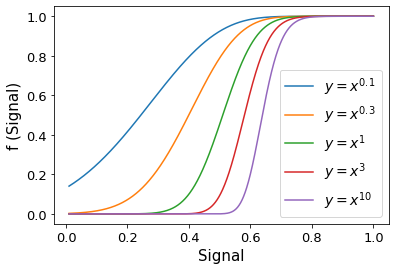

In [13]:
S = np.linspace(0.01, 1, 1000)
plt.plot(S, Mapping(5, 2, 0.1), label = r'$y = x^{0.1}$')
plt.plot(S, Mapping(5, 2, 0.3), label = r'$y = x^{0.3}$')
plt.plot(S, Mapping(5, 2, 1), label = r'$y = x^{1}$')
plt.plot(S, Mapping(5, 2, 3), label = r'$y = x^{3}$')
plt.plot(S, Mapping(5, 2, 10), label = r'$y = x^{10}$')
plt.xlabel('Signal', fontsize = 15)
plt.ylabel('f (Signal)', fontsize = 15)
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)